# ReLU - Rectified Linear Unit 

## Math behind it
---


**ReLU Function**

The Rectified Linear Unit (ReLU) is a piecewise non-linear activation function that is commonly used for neural networks. It essentially "rectifies" the input, by replacing any negative value with zero while leaving the positive values unchanged. 

$$
\mathrm{ReLU}(x) = \max(0, x) = \begin{cases}
    x, & \text{if  } x > 0, \\
    0, & \text{if  } x \le 0
\end{cases}
 $$

Advantages: 
- Computational efficient 
- Non-linear therefore enables neural networks to approximate complex functions 
- Sparse activation, since many neurons will output 0 -> only 50% are activated on a randomly intialized neural network 
- Mitigates the vanishing gradient problem, since its gradients are simply 1 for positive inputs so the gradients propagate backwards without shrinking across layers (via chain rule) unlike other activation functions like sigmoid and tanh

Disadvantages: 
- Dying ReLU problem, where some neurons are pushed into a perpetually inactive state (only outputs 0)
- Unbounded positive output

<br><br>
**Derivative of ReLU**

The derivative is used during backpropagation to compute gradients which are used to update weights

$$
\frac{d}{dx} \mathrm{ReLU}(x) = \begin{cases}
    1, & \text{if  }  x > 0, \\
    0, & \text{if  } x \le 0
\end{cases}
$$

note:  
At x = 0 the derivative is undefined, it is  not differentiable  due to the slope jumping from 0 to 1.  
However in practice we define it to be either 0 or 1 at x = 0. 

## Code
---

In [32]:
class ReLU:
    def __init__(self):
        pass

    def __call__(self, x):
        return self._max(0, x)
    
    def _max(self, a, b):
        return a if a > b else b 
    
    def derivative(self, x):
        return 1 if x > 0 else 0 
        

## Testing
---

### Imports

In [33]:
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Test ReLU Output and Plot Function 

========== Testing ===========
Testing ReLU:
  x = -10 -> ReLU(x) =  0, Expected =  0  |  ReLU'(x) =  0
  x =  -1 -> ReLU(x) =  0, Expected =  0  |  ReLU'(x) =  0
  x =   0 -> ReLU(x) =  0, Expected =  0  |  ReLU'(x) =  0
  x =   1 -> ReLU(x) =  1, Expected =  1  |  ReLU'(x) =  1
  x =  10 -> ReLU(x) = 10, Expected = 10  |  ReLU'(x) =  1

======= Plotting ReLU ========


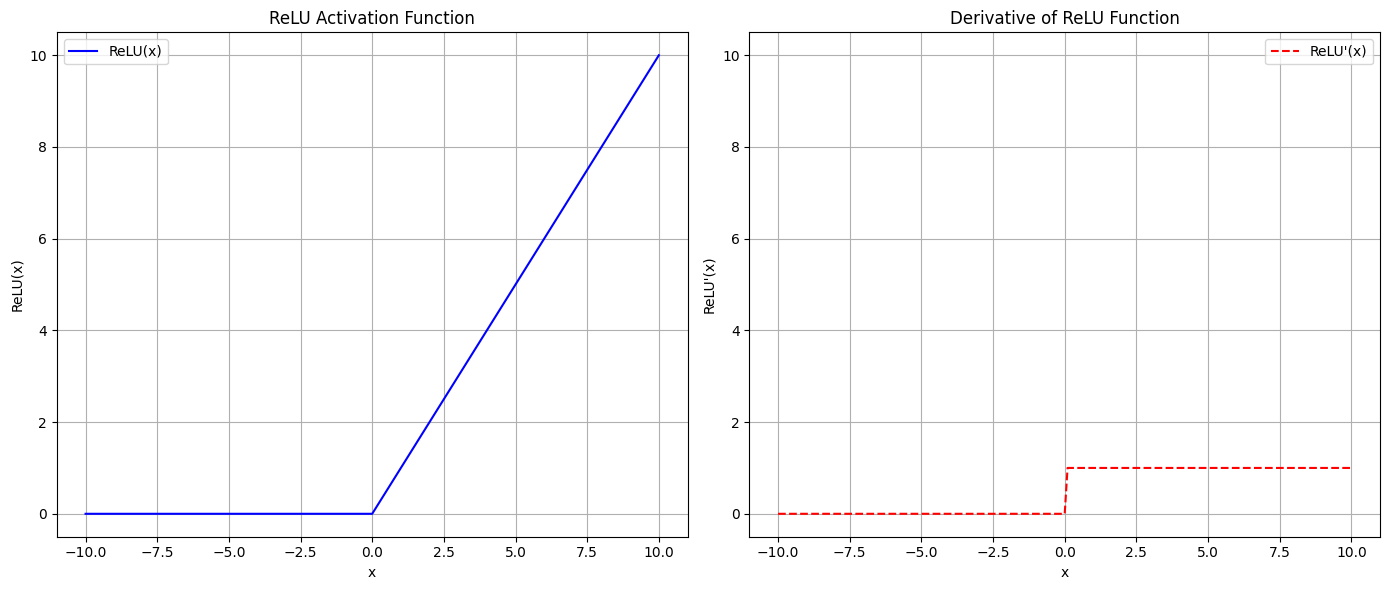

In [ ]:
import matplotlib.pyplot as plt

# intialize ReLU
relu = ReLU()


# Test values
test_inputs = [-10, -1, 0, 1, 10]
expected_output = [0, 0, 0, 1, 10]

print(" Testing ".center(30, "="))
print("Testing ReLU:")
for i in range(len(test_inputs)):
    x = test_inputs[i]
    y = relu(x)
    dy = relu.derivative(x)
    print(f"  x = {x:>3} -> ReLU(x) = {y:>2}, Expected = {expected_output[i]:>2}  |  ReLU'(x) = {dy:>2}")



# Plot
print()
print(" Plotting ReLU ".center(30, "="))

x_values = [x * 0.1 for x in range(-100, 101)]  # From -10 to 10 with step 0.1
relu_values = [relu(x) for x in x_values]
relu_derivative_values = [relu.derivative(x) for x in x_values]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot ReLU function
axs[0].plot(x_values, relu_values, label="ReLU(x)", color='blue')
axs[0].set_title("ReLU Activation Function")
axs[0].set_xlabel("x")
axs[0].set_ylabel("ReLU(x)")
axs[0].grid(True)
axs[0].legend()

# Plot ReLU derivative
axs[1].plot(x_values, relu_derivative_values, label="ReLU'(x)", color='red', linestyle='dashed')
axs[1].set_title("Derivative of ReLU Function")
axs[1].set_xlabel("x")
axs[1].set_ylabel("ReLU'(x)")
axs[1].set_ylim(-0.5, 10.5)
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()
